In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Select stock - Tesla (TSLA)
ticker = 'TSLA'
data = yf.download(ticker, start='2022-01-01', end='2024-01-01')

# Preview data
print(data.head())


C:\Users\khadi\AppData\Local\Temp\ipykernel_17720\2366762437.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2022-01-03  399.926666  400.356659  378.679993  382.583344  103931400
2022-01-04  383.196655  402.666656  374.350006  396.516663  100248300
2022-01-05  362.706665  390.113342  360.336670  382.216675   80119800
2022-01-06  354.899994  362.666656  340.166656  359.000000   90336600
2022-01-07  342.320007  360.309998  336.666656  360.123322   84164700


In [3]:
df = data.copy()

# Lagged features
df['Open_1'] = df['Open'].shift(1)
df['High_1'] = df['High'].shift(1)
df['Low_1'] = df['Low'].shift(1)
df['Volume_1'] = df['Volume'].shift(1)

# Technical indicators
df['MA_3'] = df['Close'].rolling(window=3).mean().shift(1)
df['MA_7'] = df['Close'].rolling(window=7).mean().shift(1)
df['STD_7'] = df['Close'].rolling(window=7).std().shift(1)

# Drop NA values
df.dropna(inplace=True)

# Features and target
features = ['Open_1', 'High_1', 'Low_1', 'Volume_1', 'MA_3', 'MA_7', 'STD_7']
target = 'Close'

X = df[features]
y = df[target]


In [4]:
# 80% training, 20% testing
split_index = int(len(df) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


c:\Users\khadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [6]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')


RMSE: 8.40
R^2 Score: 0.77


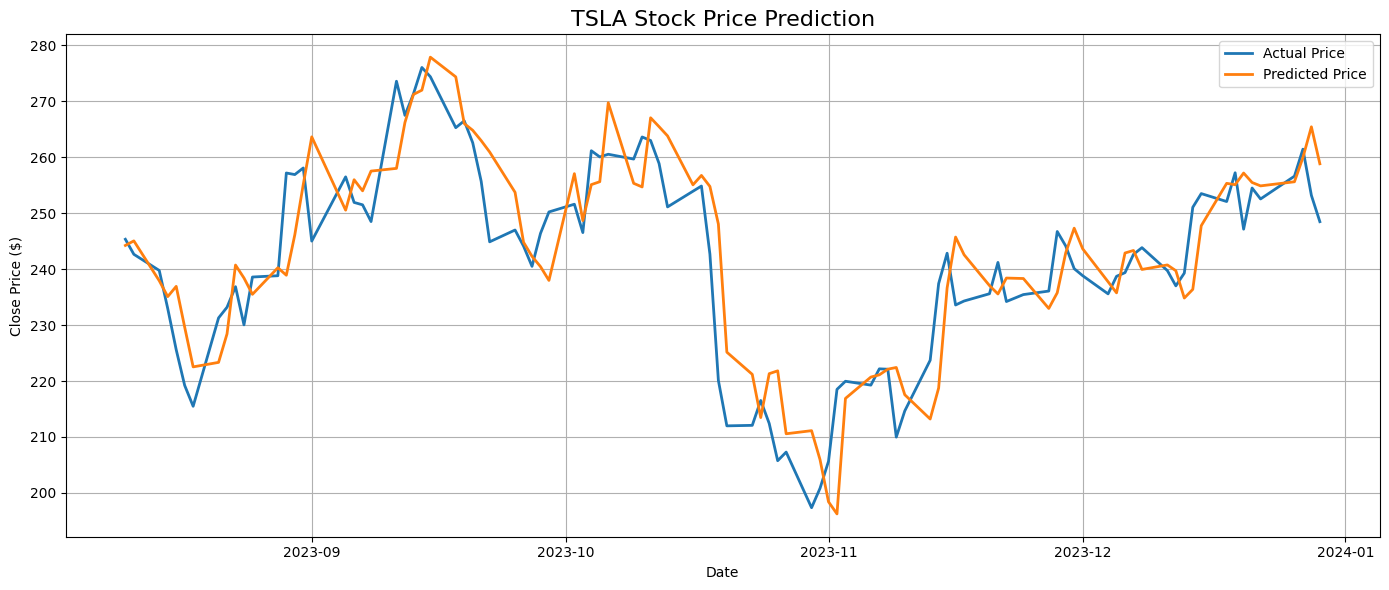

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Price', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted Price', linewidth=2)
plt.title(f'{ticker} Stock Price Prediction', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\khadi\AppData\Local\Temp\ipykernel_17720\3904010075.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_imp_df, x='Importance', y='Feature', palette='viridis')


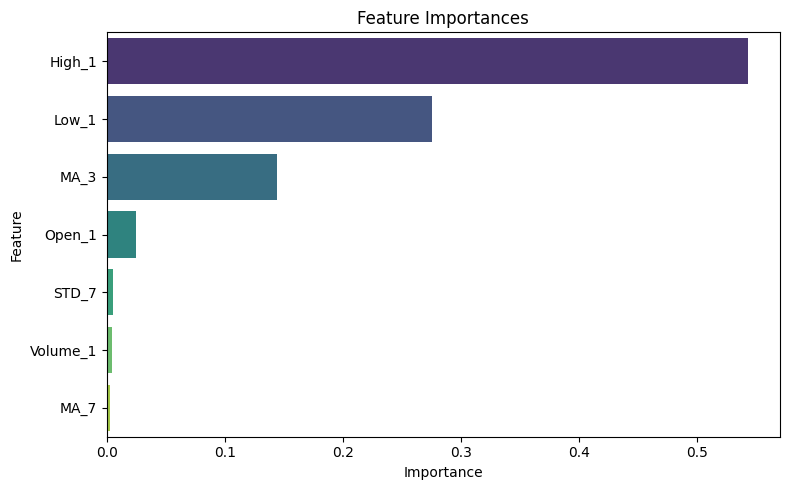

In [8]:
importance = model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(data=feature_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()
